# Hands-on lattice calculations for the AUTH 2024 Accelerator Phyiscs course
*T. Prebibaj, F. Asvesta, Y. Papaphilippou*

---

# Part V: Tracking in the CERN Proton Synchrotron Booster (PSB) with Xsuite

---

In [4]:
# Import xsuite modules and other libraries
import xtrack as xt
import xpart as xp
import xplt

from cpymad.madx import Madx
import numpy as np
import matplotlib.pyplot as plt

## Proton Synchrotron Booster
- Consists...

### Exercise 19 (guided): load and plot the layout of the PSB

Use

In [72]:
mad = Madx()
mad.globals.QH = 4.17
mad.globals.QV = 4.23
mad.chdir('psb')
mad.call('psb_flat_bottom.madx')
line= xt.Line.from_madx_sequence(mad.sequence['psb1'],
                                 deferred_expressions=True,
                                 install_apertures=True,
                                 #enable_field_errors=True, # field errors are not yet supported for thick elements
                                 enable_align_errors=True,
                                 allow_thick=True,
                                 use_compound_elements=True)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2024.04.29 10:10:30      +
  ++++++++++++++++++++++++++++++++++++++++++++
/******************************************************************************************

 * BOOSTER

 ******************************************************************************************/

 call, file = 'psb.seq';





  /************************************************************************************

  *

  * PS Booster version  (draft) LS2 in MAD X SEQUENCE format

  * Generated the 28-AUG-2020 16:25:27 from Layout

  *

  ************************************************************************************/







/************************************************************************************/

/*                       TYPES DEFINITION                                           */

/***

Converting sequence "psb1":   0%|          | 0/530 [00:00<?, ?it/s]

In [73]:
print('PSB circumference in meters: ', line.get_length()) 

PSB circumference in meters:  157.07999999999979


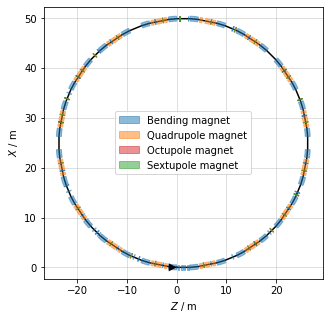

In [93]:
plot = xplt.FloorPlot(line=line, labels="S.Q.", figsize=(5,5))
plot.legend()

### Exercise 20 (guided): plot the optics functions

Use the line.twiss() method to compute the optics functions and plot them.

In [75]:
line_table = line.get_table()
line_table_df = line_table.to_pandas()
line_table_df[0:20]

,s,element_type,name,isthick,compound_name
0,0.0000,Marker,psb1$start,False,
1,0.0000,Marker,p01ring1$start,False,
2,0.0000,Drift,drift_0,True,
3,0.1795,Marker,bi1.bsw1l1.1_entry,False,bi1.bsw1l1.1
4,0.1795,XYShift,bi1.bsw1l1.1_aper_offset_entry,False,bi1.bsw1l1.1
5,0.1795,LimitRectEllipse,bi1.bsw1l1.1_aper,False,bi1.bsw1l1.1
6,0.1795,XYShift,bi1.bsw1l1.1_aper_offset_exit,False,bi1.bsw1l1.1
7,0.1795,DipoleEdge,bi1.bsw1l1.1_den,False,bi1.bsw1l1.1
8,0.1795,Bend,bi1.bsw1l1.1,True,bi1.bsw1l1.1
9,0.4925,DipoleEdge,bi1.bsw1l1.1_dex,False,bi1.bsw1l1.1


In [76]:
line.particle_ref=xp.Particles(mass0=xp.PROTON_MASS_EV,gamma0=mad.sequence.psb1.beam.gamma)
print('Reference particle added at gamma0=%s.'%(mad.sequence.psb1.beam.gamma))

line.twiss_default['method'] = '4d' # no cavity
line.twiss_default['group_compound_elements'] = True
twiss = line.twiss() # ContextCpu by default
twiss_df = twiss.to_pandas()

Reference particle added at gamma0=1.1705262269290748.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [77]:
twiss_df[0:20]

,name,s,x,px,y,py,zeta,delta,ptau,W_matrix,...,nuzeta,dzeta,dmux,dmuy,bx_chrom,by_chrom,ax_chrom,ay_chrom,wx_chrom,wy_chrom
0,psb1$start,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[2.4489541328314246, 2.999103840030686e-16, 0...",...,1.0,0.000000,0.000000,0.000000,-0.068229,1.151632,-0.226932,-1.190878,0.236967,1.656637
1,p01ring1$start,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[2.4489541328314246, 2.999103840030686e-16, 0...",...,1.0,0.000000,0.000000,0.000000,-0.068229,1.151632,-0.226932,-1.190878,0.236967,1.656637
2,drift_0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[2.4489541328314246, 2.999103840030686e-16, 0...",...,1.0,0.000000,0.000000,0.000000,-0.068229,1.151632,-0.226932,-1.190878,0.236967,1.656637
3,bi1.bsw1l1.1_entry,0.179500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[2.4329349270959364, -2.7755575615628914e-17,...",...,1.0,0.131009,-0.004532,-0.013808,-0.042183,1.263195,-0.201542,-1.060036,0.205909,1.649041
4,drift_1,0.492500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[2.4103758397165174, -1.1102230246251565e-16,...",...,1.0,0.359455,-0.012840,-0.040168,-0.004619,1.427976,-0.152181,-0.803213,0.152251,1.638373
5,bi1.bsw1l1.2_entry,0.869500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[2.3924989911132872, 2.7755575615628914e-16, ...",...,1.0,0.634611,-0.023378,-0.075036,0.025909,1.565246,-0.086050,-0.454681,0.089866,1.629948
6,drift_2,1.194500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[2.3854039143964068, 1.1102230246251565e-16, ...",...,1.0,0.871814,-0.032747,-0.106821,0.038219,1.621211,-0.025461,-0.132532,0.045924,1.626619
7,bi1.btv1l1_entry,1.327628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[2.384741107211998, 1.1102230246251565e-16, -...",...,1.0,0.968978,-0.036617,-0.120039,0.039377,1.626313,-0.000236,0.001916,0.039378,1.626314
8,drift_3,1.327628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[2.384741107211998, 1.1102230246251565e-16, -...",...,1.0,0.968978,-0.036617,-0.120039,0.039377,1.626313,-0.000236,0.001916,0.039378,1.626314
9,bi1.bcsf1l1_entry,1.334000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[2.384742149888945, 1.1102230246251565e-16, -...",...,1.0,0.973629,-0.036803,-0.120672,0.039375,1.626293,0.000973,0.008359,0.039387,1.626315


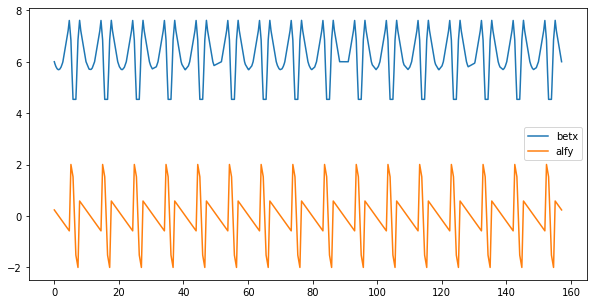

In [78]:
plt.figure(figsize=(10,5))
plt.plot(twiss_df['s'], twiss_df['betx'], label='betx')
plt.plot(twiss_df['s'], twiss_df['alfx'], label='alfy')
#plt.plot(twiss_df['s'], (1+twiss_df['alfx']**2)/twiss_df['betx'], label='gammax')
plt.legend()


### Exercise 21: matching



In [79]:
print('Qx = ', twiss.qx)
print('Qy = ', twiss.qy)

Qx =  4.169999999953575
Qy =  4.229999999961981


In [80]:
line.match(
      vary=[
            xt.Vary('kbrqf', step=1e-8),
            xt.Vary('kbrqd', step=1e-8),
      ],
      targets = [
                  xt.Target('qx', 4.40, tol=1e-5),
                  xt.Target('qy', 4.45, tol=1e-5)
      ]
)

Matching: model call n. 8       



In [81]:
twiss_after = line.twiss()
twiss_after_df = twiss_after.to_pandas()
print('Qx = ', twiss_after.qx)
print('Qy = ', twiss_after.qy)

Qx =  4.3999992615660695
Qy =  4.450006585041192


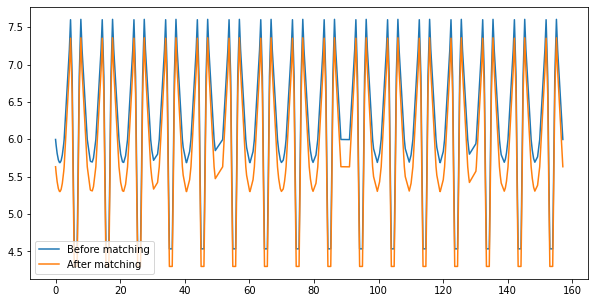

In [82]:
plt.figure(figsize=(10,5))
plt.plot(twiss_df['s'], twiss_df['betx'], label='Before matching')
plt.plot(twiss_after_df['s'], twiss_after_df['betx'], label='After matching')
plt.legend()


### Exercise 22: tracking



In [83]:
line.element_refs['br.c02'].voltage = 0.008*1e6
print('Constant voltage = 8 kV added to the dummy RF.')

particles = xp.generate_matched_gaussian_bunch(num_particles=1000,
                                total_intensity_particles=1e10,
                                nemitt_x=1e-6, nemitt_y=1e-6, sigma_z=10,
                                particle_ref=line.particle_ref,
                                line=line
                                )

Constant voltage = 8 kV added to the dummy RF.
*** Maximum RMS bunch length 24.69209659847619m.


/home/tprebiba/python_environments/base-2022/miniconda/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


... distance to target bunch length: -9.8998e+00
... distance to target bunch length: 1.4070e+01
... distance to target bunch length: 1.0223e+01
... distance to target bunch length: 6.1652e-01
... distance to target bunch length: -6.3193e-02
... distance to target bunch length: -5.7318e-04
... distance to target bunch length: 8.3483e-09
... distance to target bunch length: -5.5011e-05
--> Bunch length: 10.000000008348255
--> Emittance: 0.23120130601970812


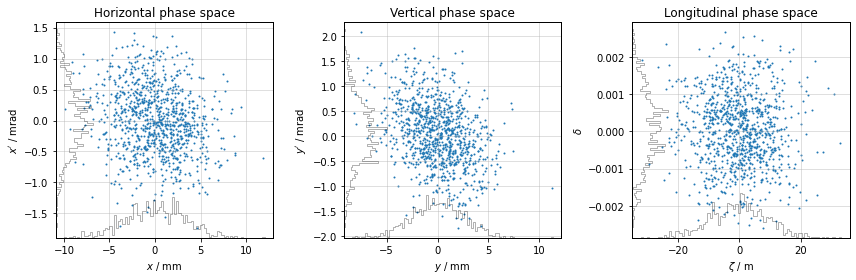

In [84]:
plot = xplt.PhaseSpacePlot(particles)
plot.fig.tight_layout()

In [85]:
line.track(particles, num_turns=1, turn_by_turn_monitor='ONE_TURN_EBE') # to save in all elements

Text(0, 0.5, 'x [mm]')

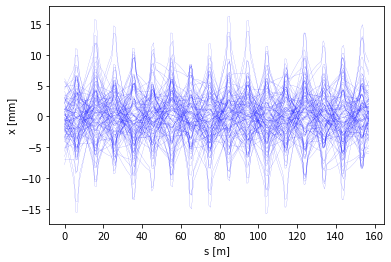

In [92]:
for i in range(100):
    plt.plot(line.record_last_track.s[0], line.record_last_track.y[i]*1e3, '-', lw=0.1, c='blue')
plt.xlabel('s [m]')
plt.ylabel('x [mm]')

In [88]:
line.vars['kbrqf']._value

0.7691428511367214

In [89]:
line.vars['k0bi1bsw1l11']._value

0.0